### Task 1: Exploratory Data Analysis (EDA):

1.	Load the dataset and perform basic data exploration.

2.	Examine the distribution of features using histograms, box plots, or density plots.

3.	Investigate correlations between features to understand relationships within the data.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r"D:\Assignments\PCA\wine.csv")

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# 1. Basic Data Exploration
print("\nDataset Information:")
data.info()

print("\nFirst 5 rows of the dataset:")
print(data.head())

print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB

First 5 rows of the dataset:
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  P

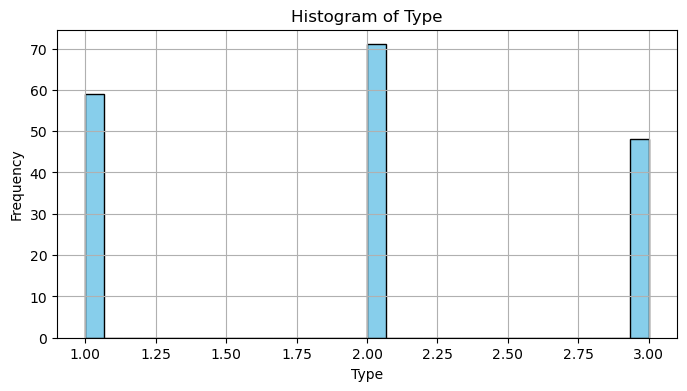

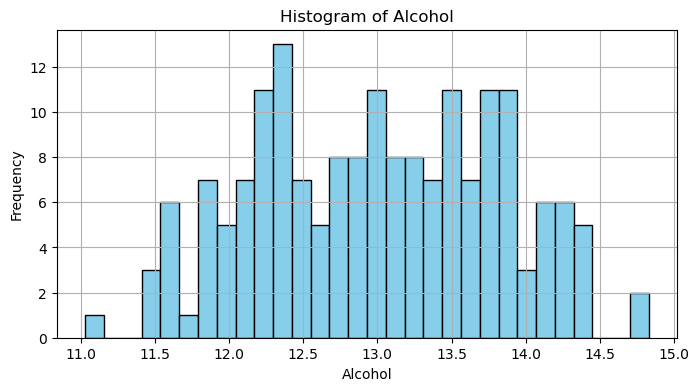

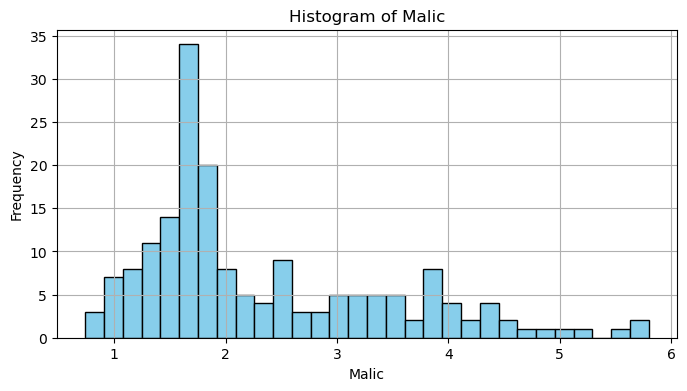

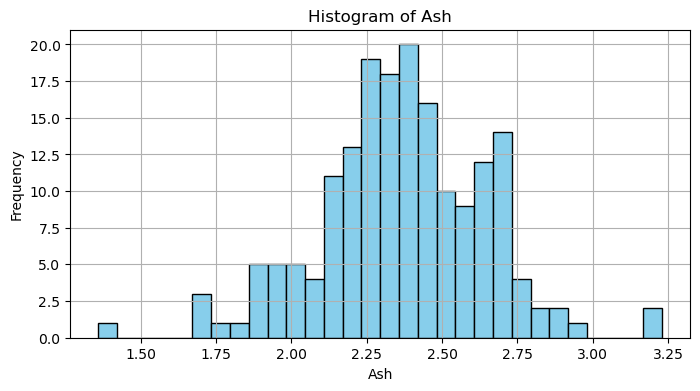

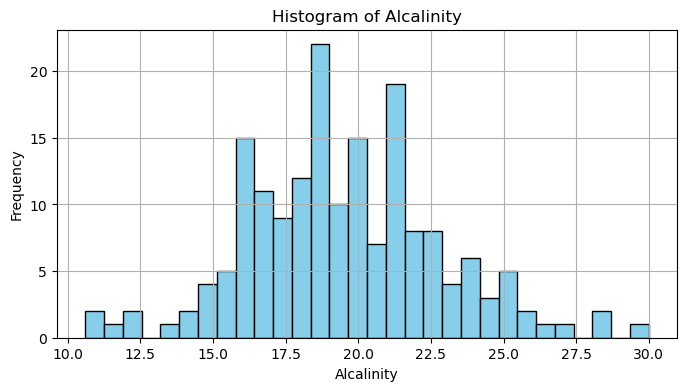

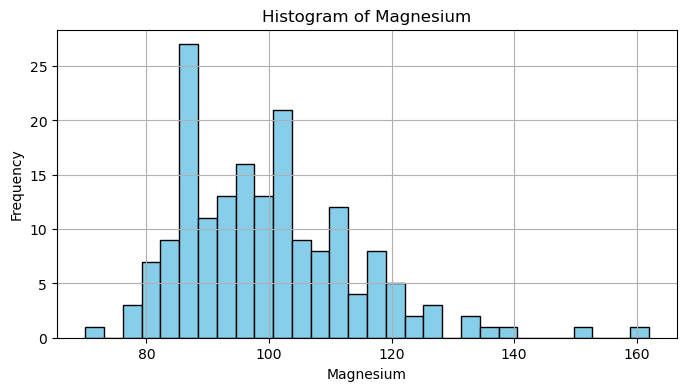

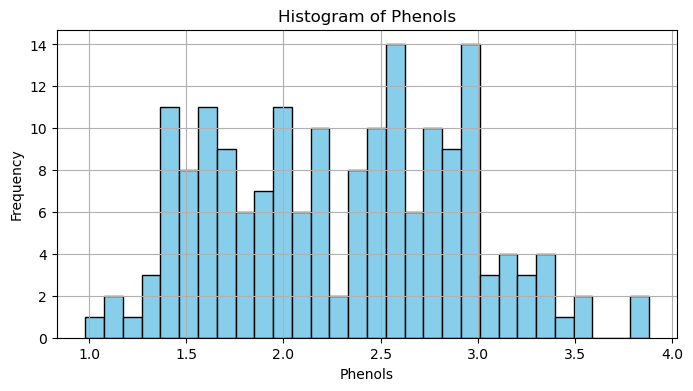

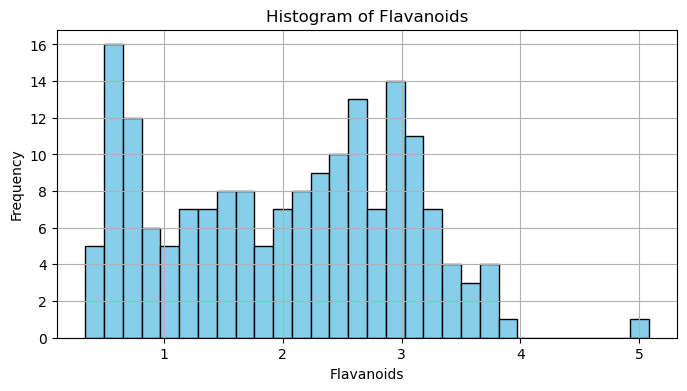

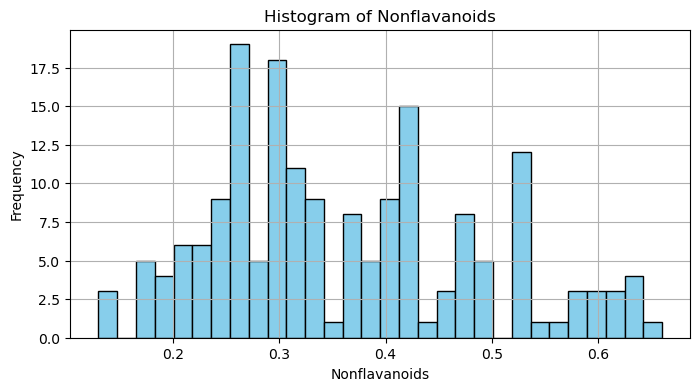

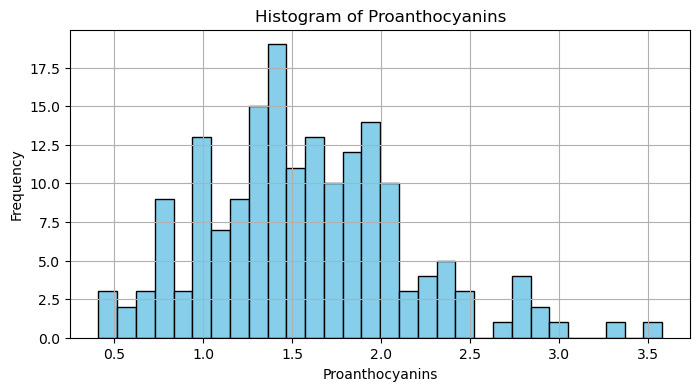

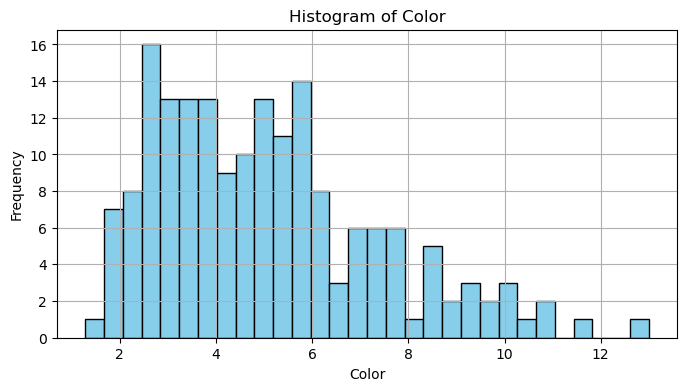

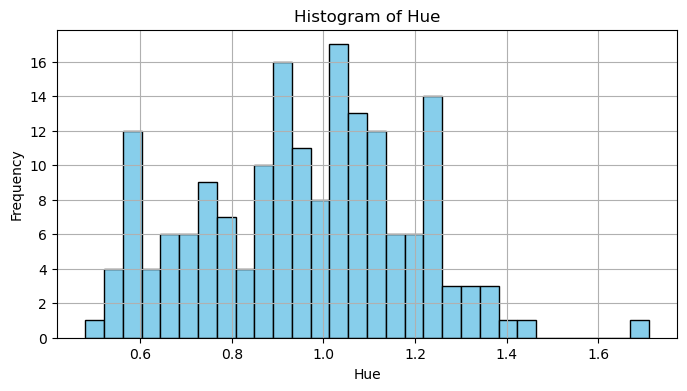

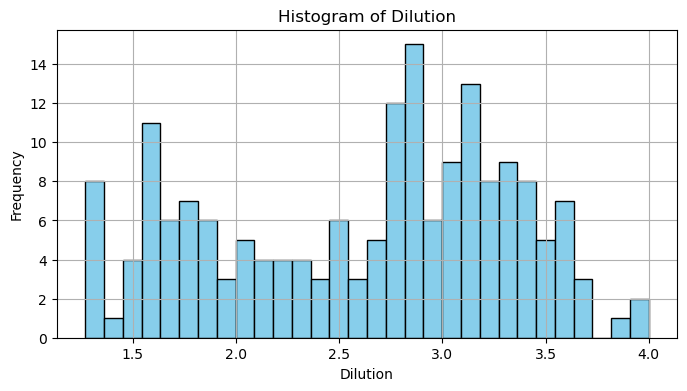

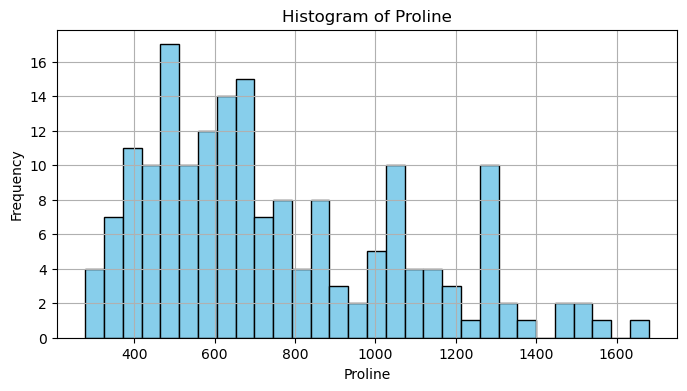

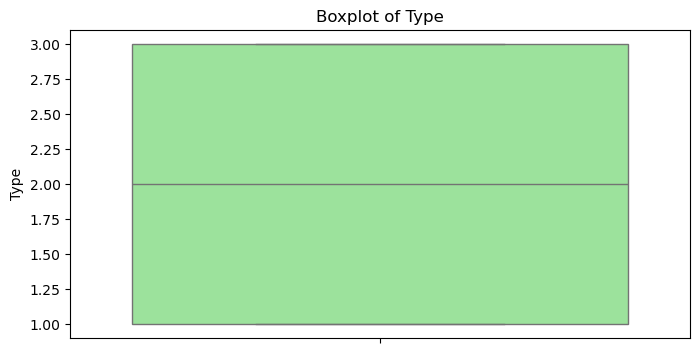

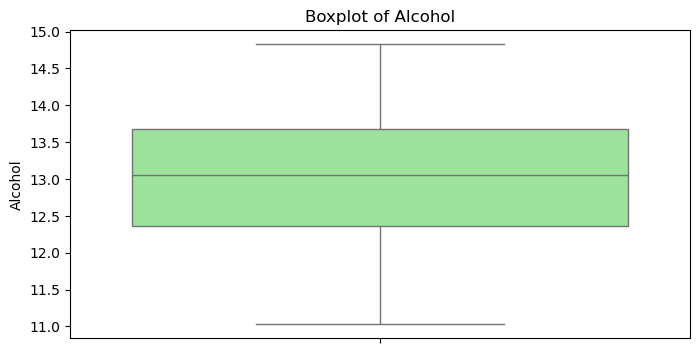

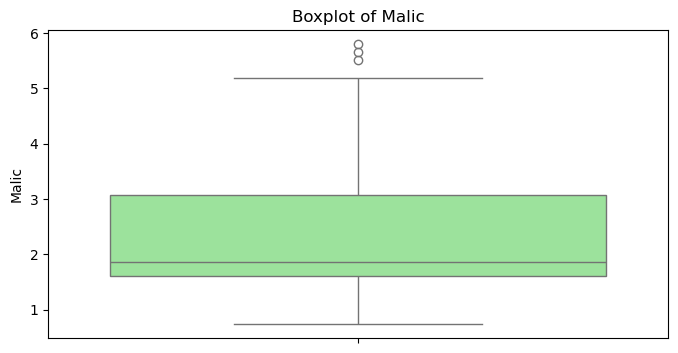

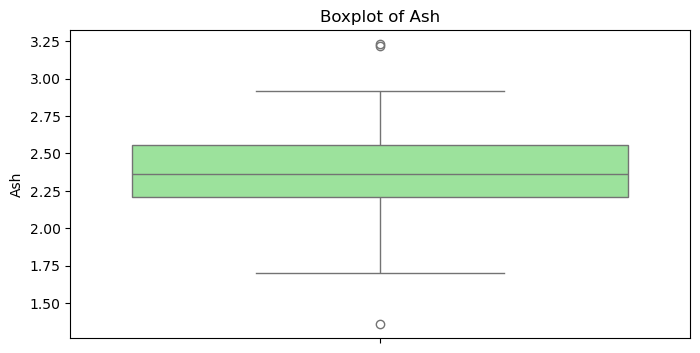

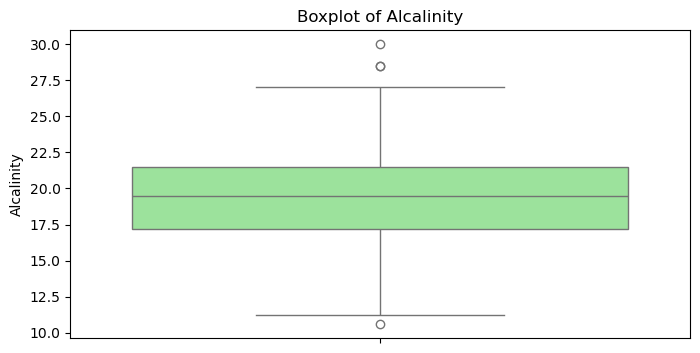

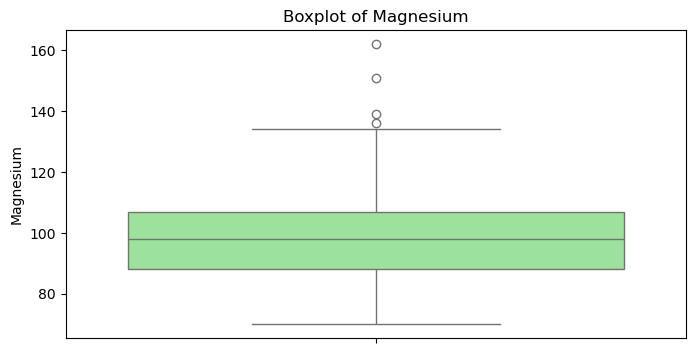

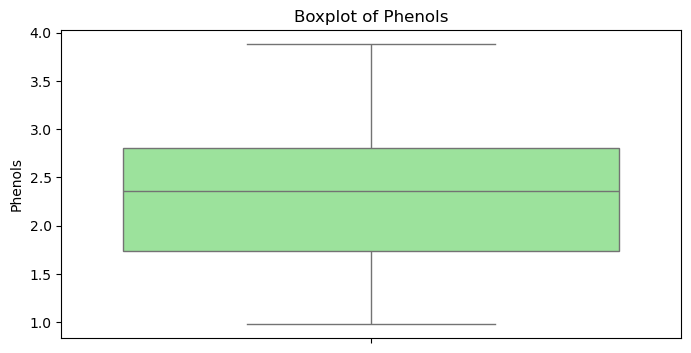

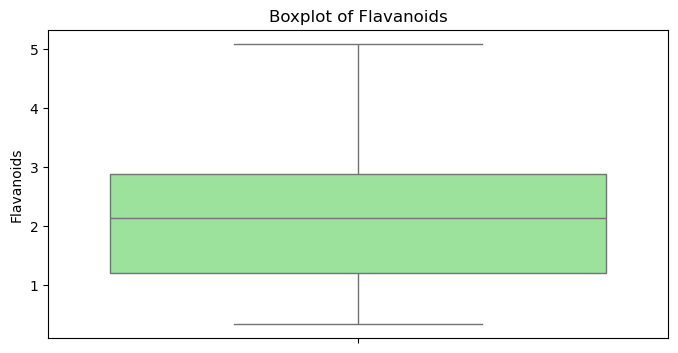

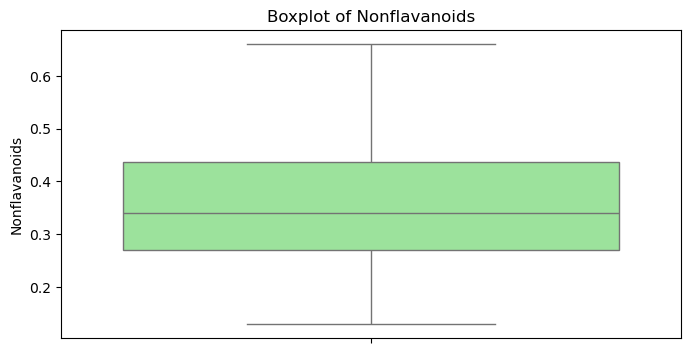

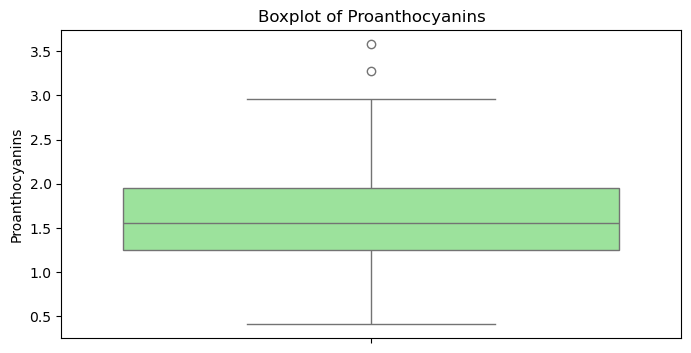

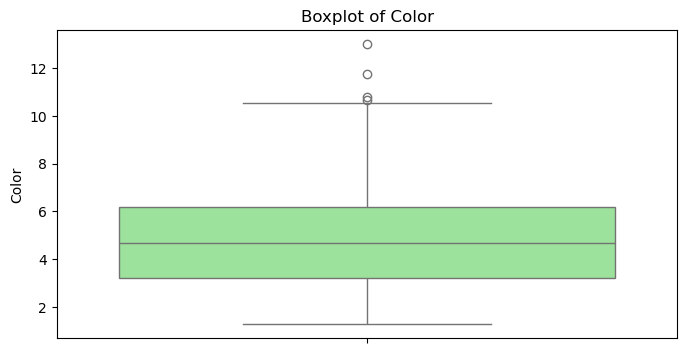

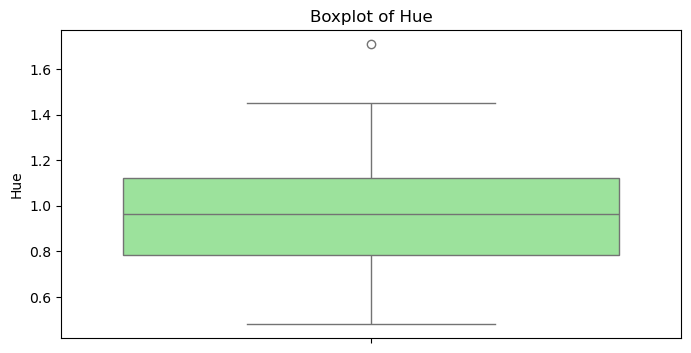

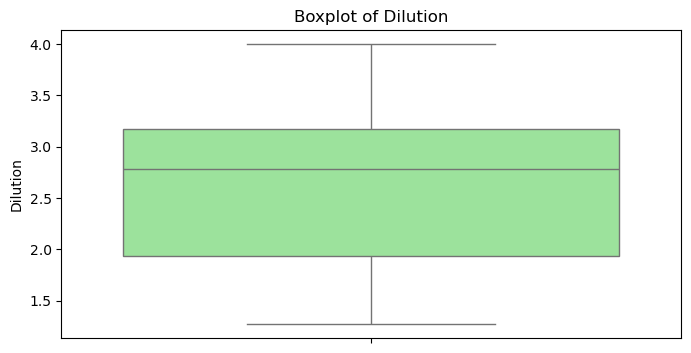

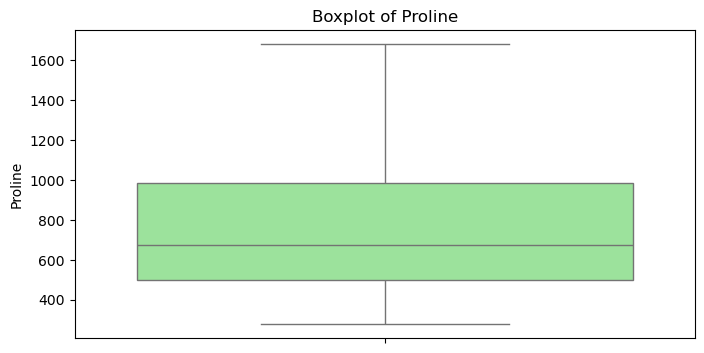

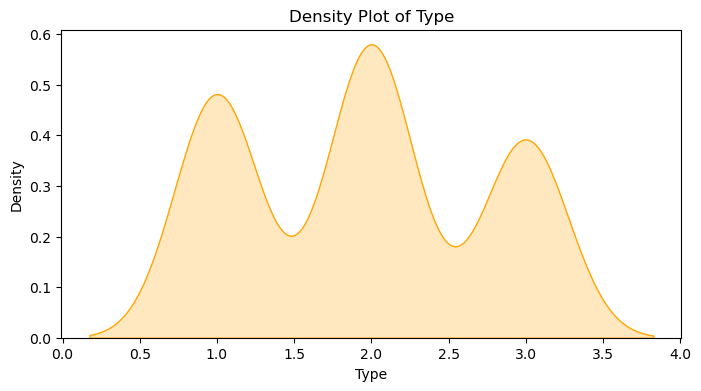

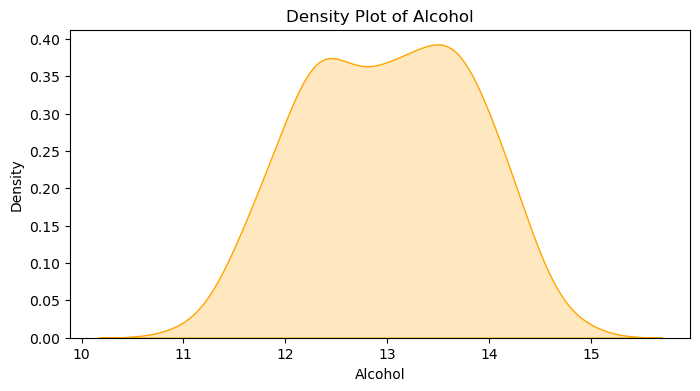

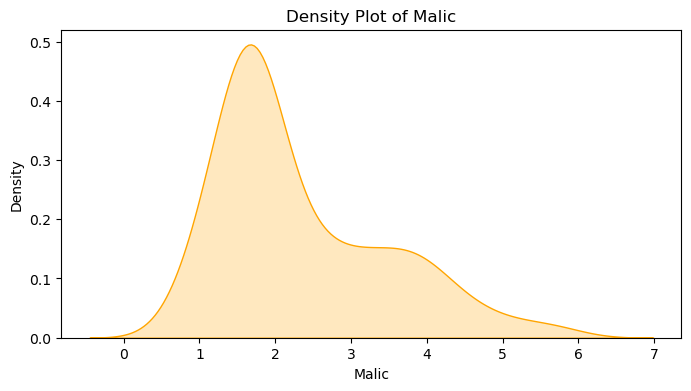

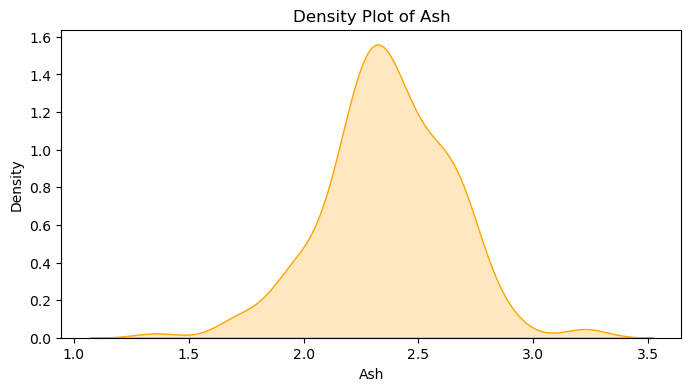

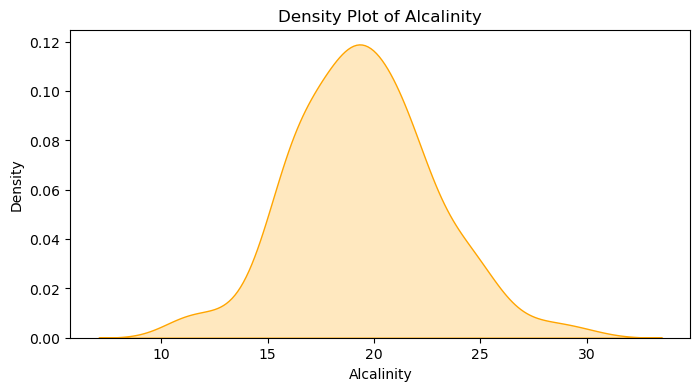

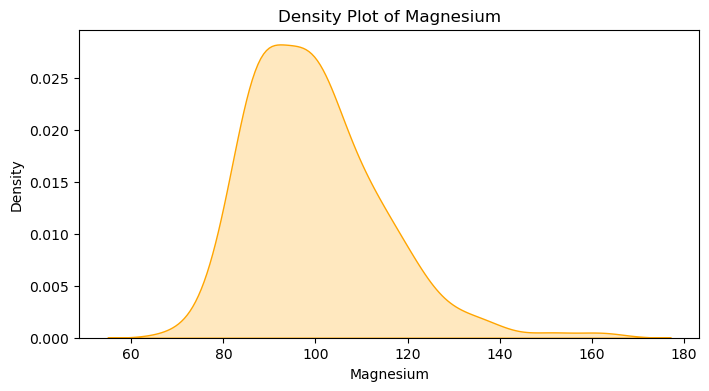

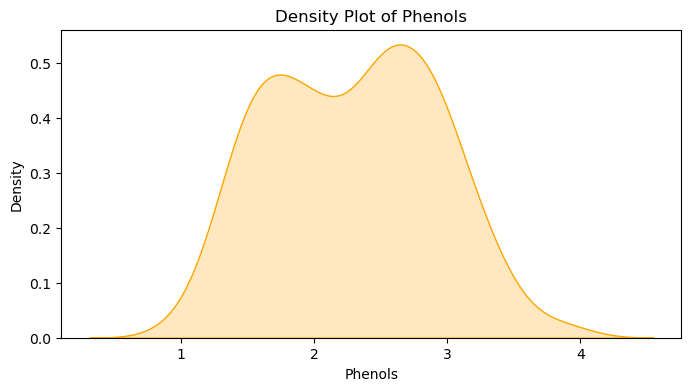

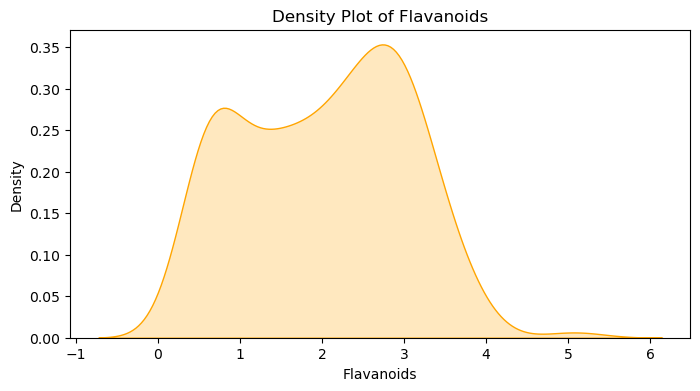

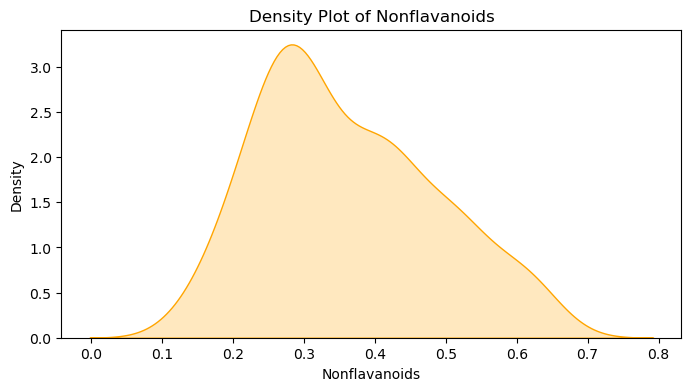

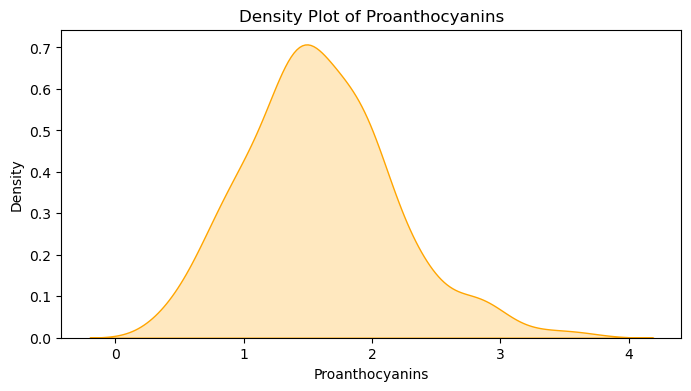

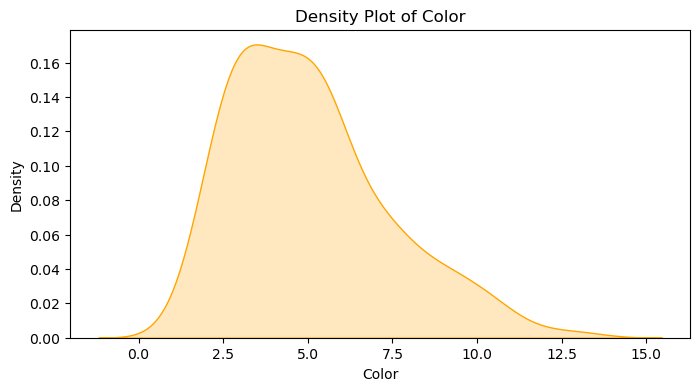

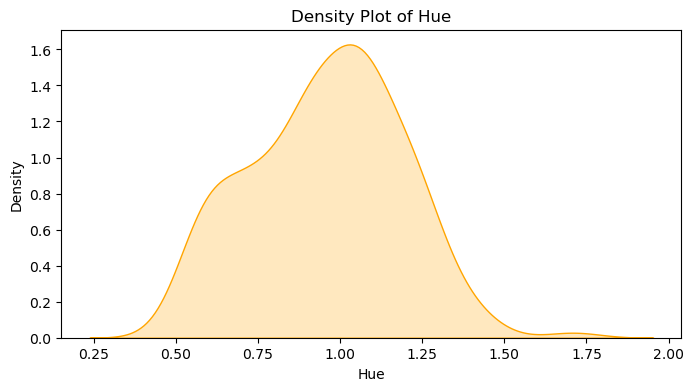

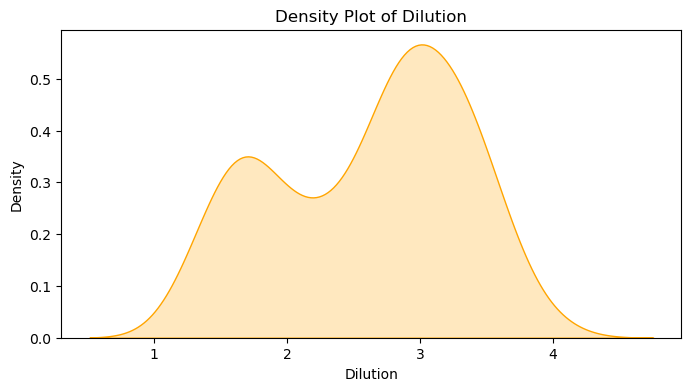

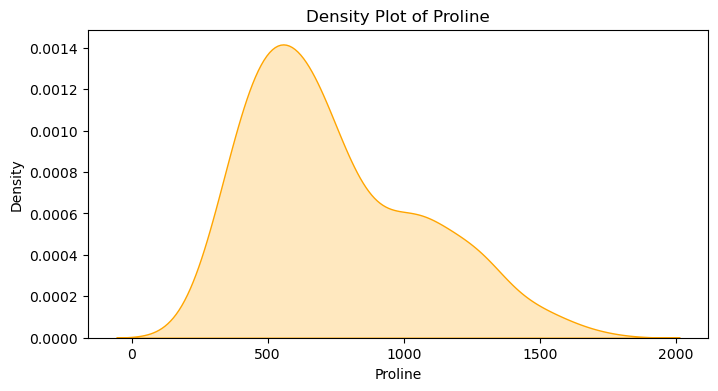

In [4]:
# 2. Feature Distributions
# Histograms
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    data[column].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[column], color='lightgreen')
    plt.title(f'Boxplot of {column}')
    plt.show()

# Density Plots
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data[column], fill=True, color='orange')
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.show()

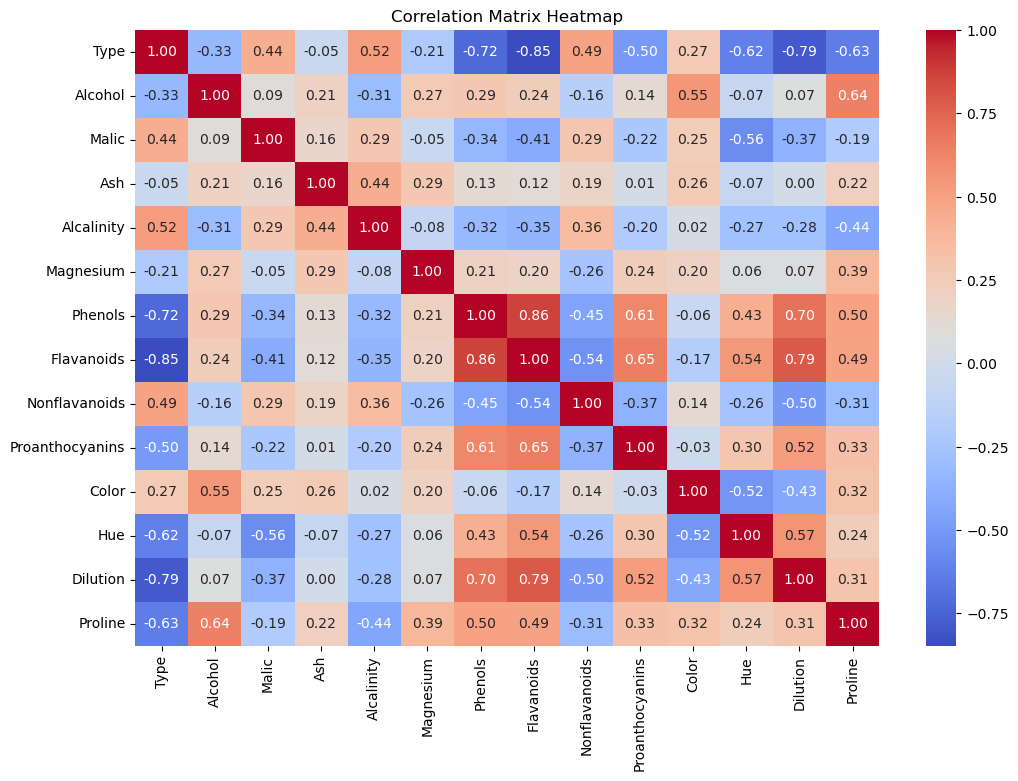

In [7]:
# 3. Correlation Analysis
# Compute the correlation matrix
correlation_matrix = data.corr()
#print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


### Task 2: Dimensionality Reduction with PCA:

1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.

2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

3.	Transform the original dataset into the principal components.


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


Standardizing the features...

Applying PCA...


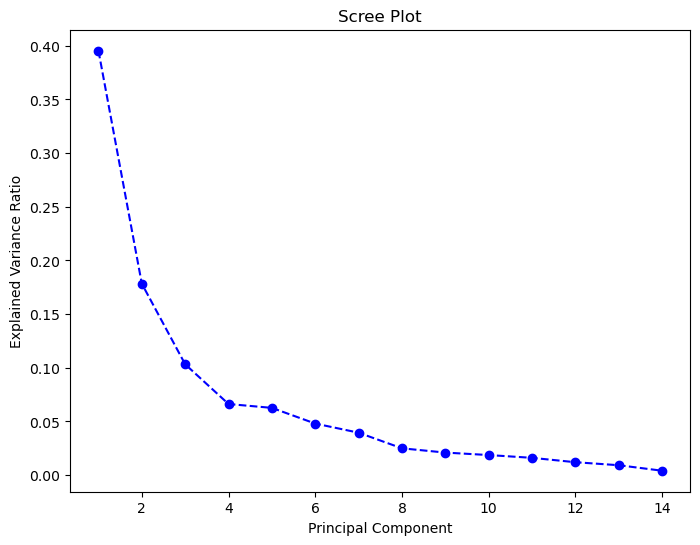

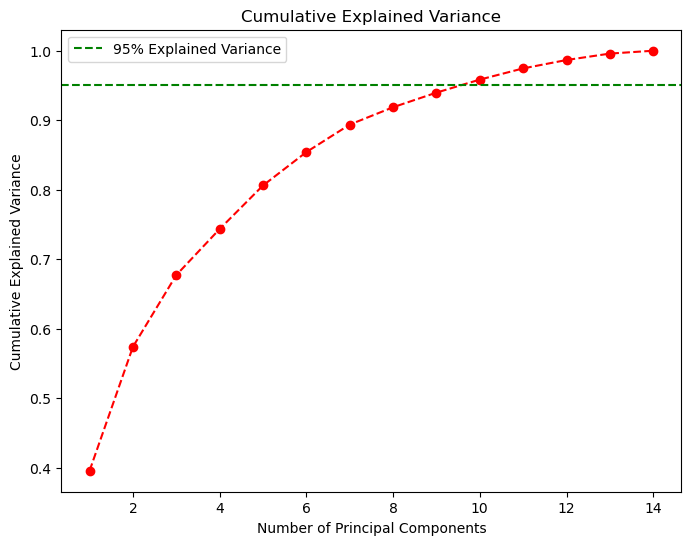


Number of components explaining 95% variance: 9

Transformed dataset shape: (178, 9)


In [13]:
# Standardizing the features
print("\nStandardizing the features...")
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']))

# Applying PCA
print("\nApplying PCA...")
pca = PCA()
pca.fit(data_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Scree plot to determine optimal number of components
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Cumulative explained variance
cumulative_variance = explained_variance.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='r')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.show()

# Transforming the dataset
# Selecting the number of components that explain at least 95% variance
n_components = sum(cumulative_variance <= 0.95)
print(f"\nNumber of components explaining 95% variance: {n_components}")
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_scaled)

print("\nTransformed dataset shape:", data_pca.shape)


### Task 3: Clustering with Original Data:

1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.

2.	Visualize the clustering results using appropriate plots.

3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


Clustering with Original Data...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


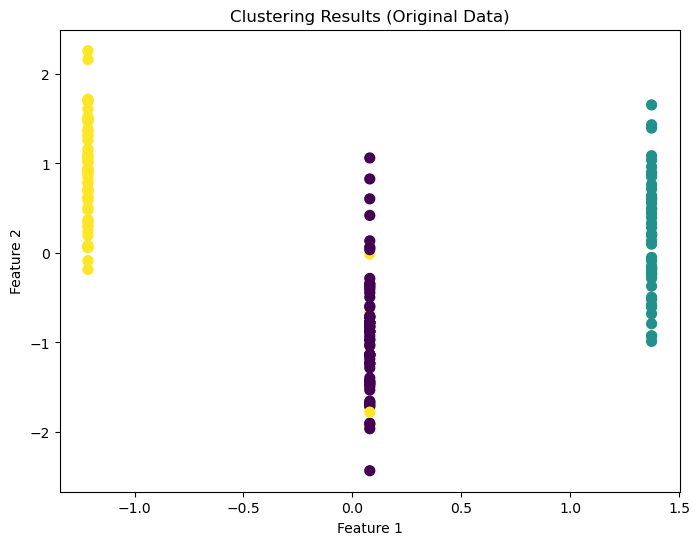

Silhouette Score (Original Data): 0.30648398324833453
Davies-Bouldin Index (Original Data): 1.315707552261773


In [16]:
# Task 3: Clustering with Original Data

print("\nClustering with Original Data...")
kmeans_original = KMeans(n_clusters=3, random_state=42)
labels_original = kmeans_original.fit_predict(data_scaled)

# Visualize clustering results (using the first two features for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels_original, cmap='viridis', s=50)
plt.title('Clustering Results (Original Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Evaluate clustering performance
silhouette_original = silhouette_score(data_scaled, labels_original)
davies_bouldin_original = davies_bouldin_score(data_scaled, labels_original)
print(f"Silhouette Score (Original Data): {silhouette_original}")
print(f"Davies-Bouldin Index (Original Data): {davies_bouldin_original}")


### Task 4: Clustering with PCA Data:

1.	Apply the same clustering algorithm to the PCA-transformed dataset.

2.	Visualize the clustering results obtained from PCA-transformed data.
    
3.	Compare the clustering results from PCA-transformed data with those from the original dataset.



Clustering with PCA Data...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


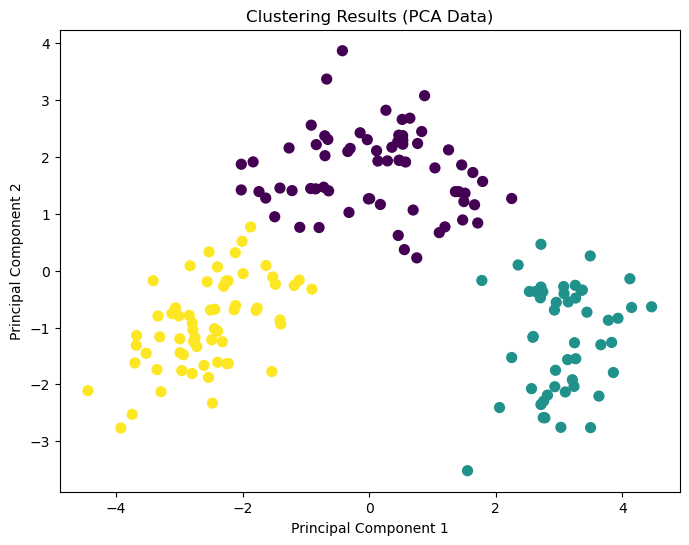

Silhouette Score (PCA Data): 0.3310070215972983
Davies-Bouldin Index (PCA Data): 1.225381773151626

Comparison of Clustering Results:
Silhouette Score - Original Data: 0.30648398324833453, PCA Data: 0.3310070215972983
Davies-Bouldin Index - Original Data: 1.315707552261773, PCA Data: 1.225381773151626


In [17]:
# Task 4: Clustering with PCA Data

print("\nClustering with PCA Data...")
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(data_pca)

# Visualize clustering results (using the first two principal components)
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels_pca, cmap='viridis', s=50)
plt.title('Clustering Results (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Evaluate clustering performance
silhouette_pca = silhouette_score(data_pca, labels_pca)
davies_bouldin_pca = davies_bouldin_score(data_pca, labels_pca)
print(f"Silhouette Score (PCA Data): {silhouette_pca}")
print(f"Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}")

# Compare clustering results
print("\nComparison of Clustering Results:")
print(f"Silhouette Score - Original Data: {silhouette_original}, PCA Data: {silhouette_pca}")
print(f"Davies-Bouldin Index - Original Data: {davies_bouldin_original}, PCA Data: {davies_bouldin_pca}")


### Task 5: Comparison and Analysis:

1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.

2.	Discuss any similarities or differences observed in the clustering results.

3.	Reflect on the impact of dimensionality reduction on clustering performance.

4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.


In [ ]:
# Task 5: Comparison and Analysis
print("\nTask 5: Comparison and Analysis")
print("1. Clustering results obtained from the original dataset and PCA-transformed data show:")
print(f"   - Silhouette Score: Original Data = {silhouette_original}, PCA Data = {silhouette_pca}")
print(f"   - Davies-Bouldin Index: Original Data = {davies_bouldin_original}, PCA Data = {davies_bouldin_pca}")

if silhouette_pca > silhouette_original:
    print("   - PCA-transformed data resulted in slightly better clustering as per the Silhouette Score.")
else:
    print("   - Original data performed better for clustering as per the Silhouette Score.")

if davies_bouldin_pca < davies_bouldin_original:
    print("   - PCA-transformed data has better compactness and separation among clusters.")
else:
    print("   - Original data clusters are more compact and separated.")

print("2. Observed differences are primarily due to dimensionality reduction simplifying relationships between features.")
print("3. PCA impacts clustering performance by reducing noise and redundancy but may lose some information.")
print("4. Trade-offs:")
print("   - Using PCA simplifies data and reduces computational cost, but original data retains all feature information.")
